## Bibliothèques

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Path

In [8]:
DIR_PATH = os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
WRLD_PATH = os.path.join(DATA_PATH + os.sep, "World")
AMS_PATH =  os.path.join(WRLD_PATH + os.sep, "Amsterdam")

## CSV

In [3]:
ams_listings = pd.read_csv(AMS_PATH + os.sep + "listings.csv", low_memory=False)

In [4]:
ams_reviews = pd.read_csv(AMS_PATH + os.sep + "reviews.csv", low_memory=False)

In [5]:
ams_listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03
5,28658,https://www.airbnb.com/rooms/28658,20181206172549,2018-12-06,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,2 beds guest room in Amsterdam West near Erasm...,none,"The listing is located in Amsterdam west, betw...",...,f,NaN,{Amsterdam},f,f,moderate,t,t,2,4.16
6,28871,https://www.airbnb.com/rooms/28871,20181206172549,2018-12-06,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,2.13
7,29051,https://www.airbnb.com/rooms/29051,20181206172549,2018-12-06,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,the street is quite lively especially on weeke...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,4.07
8,31080,https://www.airbnb.com/rooms/31080,20181206172549,2018-12-06,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,0.36
9,41125,https://www.airbnb.com/rooms/41125,20181206172549,2018-12-06,Amsterdam Center Entire Apartment,NaN,"A nice, sunny and spacious apartment in the ce...","A nice, sunny and spacious apartment in the ce...",none,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,0.78


## Cleaning

In [6]:
ams_listings = ams_listings.loc[:,['id', 'room_type', 'host_id', 'host_since', 'host_response_rate', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'price', 'cleaning_fee', 'zipcode', 'number_of_reviews']]


In [9]:
ams_listings = ams_listings.dropna(subset=['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'price', 'zipcode' ])
ams_listings

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
1,3209,Entire home/apt,3806,2008-10-24,100%,1.03,9.0,9.0,10.0,10.0,9.0,96.0,$160.00,$40.00,1013 XE,42
2,20168,Entire home/apt,59484,2009-12-02,100%,2.18,9.0,10.0,9.0,9.0,10.0,87.0,$80.00,NaN,1017,233
3,25428,Entire home/apt,56142,2009-11-20,100%,0.09,10.0,10.0,10.0,10.0,10.0,100.0,$125.00,$40.00,1016,1
4,27886,Private room,97647,2010-03-23,100%,2.03,10.0,10.0,10.0,10.0,10.0,99.0,$150.00,$0.00,1013,171
5,28658,Private room,123414,2010-05-12,100%,4.16,9.0,9.0,9.0,10.0,10.0,93.0,$65.00,$15.00,1056,434
6,28871,Private room,124245,2010-05-13,100%,2.13,10.0,10.0,10.0,10.0,10.0,97.0,$75.00,NaN,1017,215
7,29051,Private room,124245,2010-05-13,100%,4.07,10.0,10.0,10.0,10.0,10.0,95.0,$55.00,NaN,1017,383
8,31080,Entire home/apt,133488,2010-05-27,0%,0.36,9.0,9.0,10.0,10.0,10.0,95.0,$219.00,$60.00,1059,32
9,41125,Entire home/apt,178515,2010-07-23,100%,0.78,9.0,10.0,10.0,10.0,9.0,95.0,$180.00,$40.00,1015,76
10,42970,Private room,187580,2010-08-01,100%,4.24,9.0,10.0,10.0,10.0,10.0,98.0,$159.00,$35.00,1012,426


## Analysis

### Price

In [11]:
ams_listings.price = [x.strip('$') for x in ams_listings.price]
ams_listings.price = ams_listings.price.apply(lambda x: x.replace(',',''))
ams_listings.price = [float(x) for x in ams_listings.price]
ams_listings_price = ams_listings.sort_values(by="price")
ams_listings_price

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
14494,21423332,Entire home/apt,7519321,2013-07-16,NaN,0.18,8.0,10.0,10.0,9.0,9.0,90.0,0.0,$25.00,1058,2
13842,20597844,Entire home/apt,11974014,2014-02-05,100%,0.51,10.0,10.0,10.0,10.0,10.0,95.0,0.0,$40.00,1055 AA,8
13879,20644162,Entire home/apt,5011415,2013-02-08,NaN,1.35,9.0,10.0,10.0,10.0,10.0,98.0,8.0,$55.00,1054 XJ,20
6635,11147683,Private room,34203893,2015-05-25,NaN,0.12,10.0,9.0,10.0,10.0,9.0,90.0,19.0,NaN,1056,4
10970,17093014,Private room,114647706,2017-02-03,94%,2.37,9.0,8.0,10.0,10.0,9.0,90.0,23.0,$15.00,1034,52
11614,18100432,Private room,114647706,2017-02-03,94%,3.08,9.0,9.0,10.0,10.0,10.0,94.0,24.0,$15.00,1034,62
15118,22159480,Private room,4278834,2012-11-29,50%,0.94,10.0,9.0,10.0,10.0,10.0,96.0,25.0,$15.00,1094,10
9418,14659123,Shared room,91055585,2016-08-21,NaN,0.15,10.0,10.0,10.0,10.0,10.0,100.0,25.0,NaN,1064 RN,4
14919,21908927,Private room,147887892,2017-08-27,NaN,6.06,9.0,8.0,9.0,9.0,8.0,86.0,25.0,$10.00,1103 CE,76
17301,26116115,Private room,196317045,2018-06-18,NaN,5.00,10.0,10.0,10.0,10.0,7.0,85.0,25.0,NaN,1097 RK,5


In [12]:
meanPrice = ams_listings.price.mean()
print("Mean price for a night in Amsterdam : " + str(meanPrice) + "$.")

Mean price for a night in Amsterdam : 148.3141574626425$.


<function matplotlib.pyplot.show(*args, **kw)>

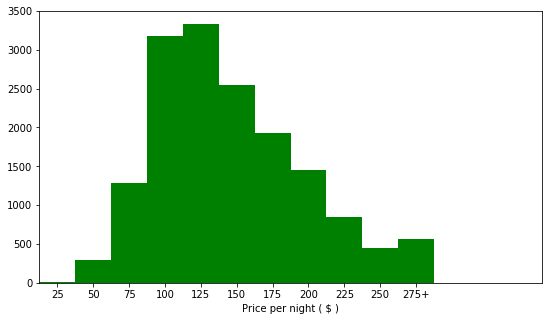

In [14]:
price = ams_listings['price']
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)
plt.xlabel("Price per night ( $ )")
plt.hist(price, color='green', bins = bins)
plt.show

### type of house

In [15]:
nbRoom = len(ams_listings)
print("Total of house :" + str(nbRoom))

Total of house :16931


In [16]:
room = ams_listings
entire = room.loc[room["room_type"]=="Entire home/apt"]
private = room.loc[room["room_type"]=="Private room"]
nbEntire = len(entire)
nbPrivate = len(private)
percEntire = nbEntire/nbRoom * 100
percPrivate = nbPrivate/nbRoom * 100
print("Total Entire home/apt : " + str(nbEntire) + " (" + str(percEntire) + "%).")
print("Total Private room : " + str(nbPrivate) + " (" + str(percPrivate) + "%).")

Total Entire home/apt : 13430 (79.32195381253322%).
Total Private room : 3447 (20.3591046010277%).


In [17]:
meanEntire = entire.price.mean()
meanPrivate = private.price.mean()
print("Mean price for entire home/apt :" + str(meanEntire) + "$.")
print("Mean price for Private room :" + str(meanPrivate) + "$.")

Mean price for entire home/apt :161.5451228592703$.
Mean price for Private room :97.70147954743256$.


In [18]:
ttest_ind(private["price"], entire["price"])

Ttest_indResult(statistic=-27.113612450846084, pvalue=1.6651963401148535e-158)

### Activity

In [19]:
reviewMonthMean = room.reviews_per_month.mean()
print("Mean of review per month : " + str(reviewMonthMean))

Mean of review per month : 1.0689161892386745


In [21]:
nbReview = len(ams_reviews)
debut = min(ams_reviews["date"])
print("Total reviews since " + str(debut) + " : " + str(nbReview))

Total reviews since 2009-03-30 : 431830


In [23]:
ams_reviews['date'] = pd.to_datetime(ams_reviews['date'])
year = ams_reviews.loc[:,['date']]
yearReview = year.groupby(year.date.dt.year).count()
print("Total reviews per year :")
yearReview

Total reviews per year :


,date
date,
2009,12
2010,99
2011,891
2012,2804
2013,8985
2014,21724
2015,46793
2016,84107
2017,121119


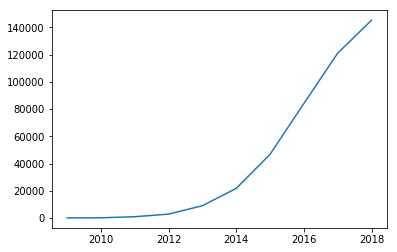

In [24]:
plt.plot(yearReview)

### Top 10 room

In [26]:
lot_of_rev = ams_listings.nlargest(100, "number_of_reviews")
top_10 = lot_of_rev.nlargest(10, "review_scores_rating")
top_10 = top_10.loc[:,['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'review_scores_rating', 'price', 'zipcode', 'number_of_reviews']]
top_10


,id,room_type,host_id,host_since,reviews_per_month,review_scores_rating,price,zipcode,number_of_reviews
6342,10432232,Private room,53734444,2016-01-07,11.44,100.0,85.0,1021 BT,402
91,193038,Private room,935742,2011-08-07,5.64,99.0,95.0,1017,497
324,579851,Private room,2851886,2012-07-06,4.80,99.0,129.0,1013,360
1004,1358042,Private room,7371529,2013-07-09,5.40,99.0,75.0,1023,348
569,805368,Private room,4239610,2012-11-25,4.73,99.0,110.0,1016,346
1629,2471617,Entire home/apt,6331314,2013-05-11,5.95,99.0,149.0,1011CB,337
6870,11565464,Private room,61094269,2016-03-01,9.42,99.0,130.0,1018 AD,305
1897,3003987,Private room,15307319,2014-05-09,5.47,99.0,115.0,1018 WS,303
7040,11857316,Entire home/apt,6192042,2013-05-02,9.19,99.0,125.0,1031CK,299
2111,3347583,Private room,16894811,2014-06-17,5.38,99.0,100.0,1073 CJ,291


In [30]:
LIS_PATH = os.path.join(AMS_PATH + os.sep, "clean_listing.csv")
PRI_PATH = os.path.join(AMS_PATH + os.sep, "price.csv")
ENT_PATH = os.path.join(AMS_PATH + os.sep, "entire_house.csv")
PRV_PATH = os.path.join(AMS_PATH + os.sep, "private_room.csv")
YEA_PATH = os.path.join(AMS_PATH + os.sep, "year_review.csv")

ams_listings_price.to_csv(LIS_PATH)
price.to_csv(PRI_PATH)
entire.to_csv(ENT_PATH)
private.to_csv(PRV_PATH)
yearReview.to_csv(AMS_PATH + "/year_review.csv")